# Ciência de Dados - Projeto 3

## Análise de previsão de doenças cardiovasculares

**Alunas: Gabriela Mitu, Gabriella Cuckier**

________

## Introdução

Segundo a organização Pan-Americana da Saúde, doenças cardiovasculares são a principal causa de morte no mundo. Mai de 17 milhões de pessoas morreram por causa delas em 2015, o que representa 31% de todas as mortes em nível global.

A causa de doenças cardiovasculares envolve uma série de variáveis, como arritmias, insuficiência venosa, cardiopatia congênita, entre outras.

Visto a gravidade de tal questão, a previsão de doenças cardiovasculares é considerada um dos mais importantes assuntos na seção de análise de dados clínicos. Desta forma, a mineração de dados transforma a grande coleção de dados brutos de assistência médica em informações que podem auxiliar na tomada de decisões.

Portanto, com o objetivo de apoiar este estudo, foi escolhido este tema de análise de doenças cardiovasculares para o Projeto 3 de Ciência de Dados com a uso de ferramentas como o python para desenvolver um Machine Learning através de um DataSet do repositório da UCI.

O método utilizado será o de aprendizado supervisionado com o intuito de prever um rótulo (se alguém terá ou não a doença  cardíaca).
Para atingir esse objetivo, foram selecionados alguns atributos a serem analisados, contidos nas colunas do dataset.  Eles estão relacionados com exames de pacientes. É importante ressaltar que apenas um destes fatores isolados não é suficiente para o surgimento de uma doença, porém a combinação de alguns pode ser determinante.


•	Idade


•	Sexo


•	Presença de dores no peito


•	Pressão sanguínea em repouso


•	Colesterol


•	Glicemia (Quando maior que 120mg/dl: 1=True, caso contrário: 0=False)



•	Medida do eletrocardiograma em repouso


•	Frequência cardíaca máxima 


•	Dores no peito temporárias causadas por exercícios


•	Anormalidades vistas no eletrocardiograma em período de exercícios


•	Número de principais vasos sanguíneos  coloridos no exame de fluoroscopia


•	Produção anormal de hemoglobina



Além disso, o dataset contém a coluna de presença de doenças cardíacas, que será importante para ensinar o classificador.


## Regressão logística

__________
# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [87]:
dados=pd.read_csv("heart.csv")

In [141]:
dados = dados.rename(columns = {'target':'diagnostico', 'age':'idade', 'sex':'sexo', 'cp':'dores_peito', 'trestbps':'pressao', 'chol':'colesterol', 'fbs':'glicemia', 'restecg':'eletrocar_repouso', 'thalach':'freq_card_max' , 'exang':'angina_exercicio', 'oldpeak':'efeito_exercicio', 'slope':'eletrocar_exercicio', 'ca':'vasos', 'thal':'hemoglobina' })
dados.head()

,idade,sexo,dores_peito,pressao,colesterol,glicemia,eletrocar_repouso,freq_card_max,angina_exercicio,efeito_exercicio,eletrocar_exercicio,vasos,hemoglobina,diagnostico
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [142]:
var_num=['idade','pressao','freq_card_max','efeito_exercicio','colesterol']
var_cat=[x for x in df.columns if x not in var_num]

In [96]:
target=(dados.diagnostico.value_counts())
target

1    165
0    138
Name: diagnostico, dtype: int64

## Variáveis quantitativas

In [98]:
dados[var_num].describe()

,idade,pressao,freq_card_max,efeito_exercicio,colesterol
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,149.646865,1.039604,246.264026
std,9.082101,17.538143,22.905161,1.161075,51.830751
min,29.000000,94.000000,71.000000,0.000000,126.000000
25%,47.500000,120.000000,133.500000,0.000000,211.000000
50%,55.000000,130.000000,153.000000,0.800000,240.000000
75%,61.000000,140.000000,166.000000,1.600000,274.500000
max,77.000000,200.000000,202.000000,6.200000,564.000000


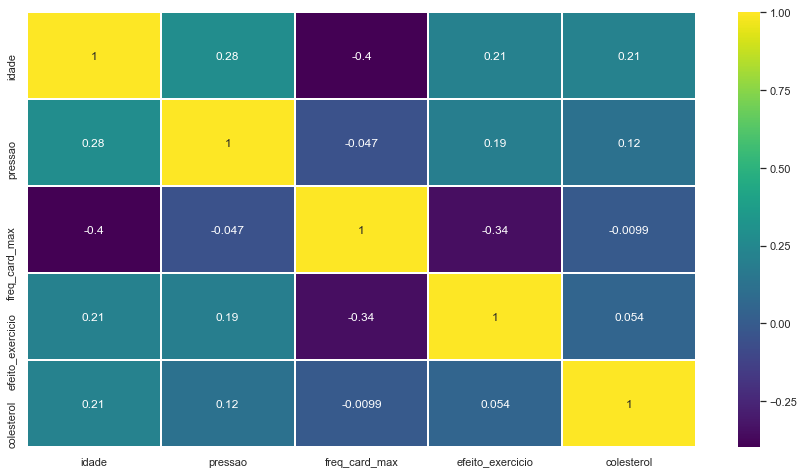

In [116]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.heatmap(corrdados, annot = True, cmap='viridis', linecolor='white',  linewidths=1)
plt.show()

# plot using a color palette
#sns.heatmap(df, cmap="YlGnBu")
#sns.heatmap(df, cmap="Blues")
#sns.heatmap(df, cmap="BuPu")
#sns.heatmap(df, cmap="Greens")
 
#add this after your favorite color to show the plot
#sns.plt.show()

In [17]:
var_num=['idade','pressao','freq_cardiaca_max','efeito_exercicio','colesterol']
var_cat=[x for x in df.columns if x not in var_num]

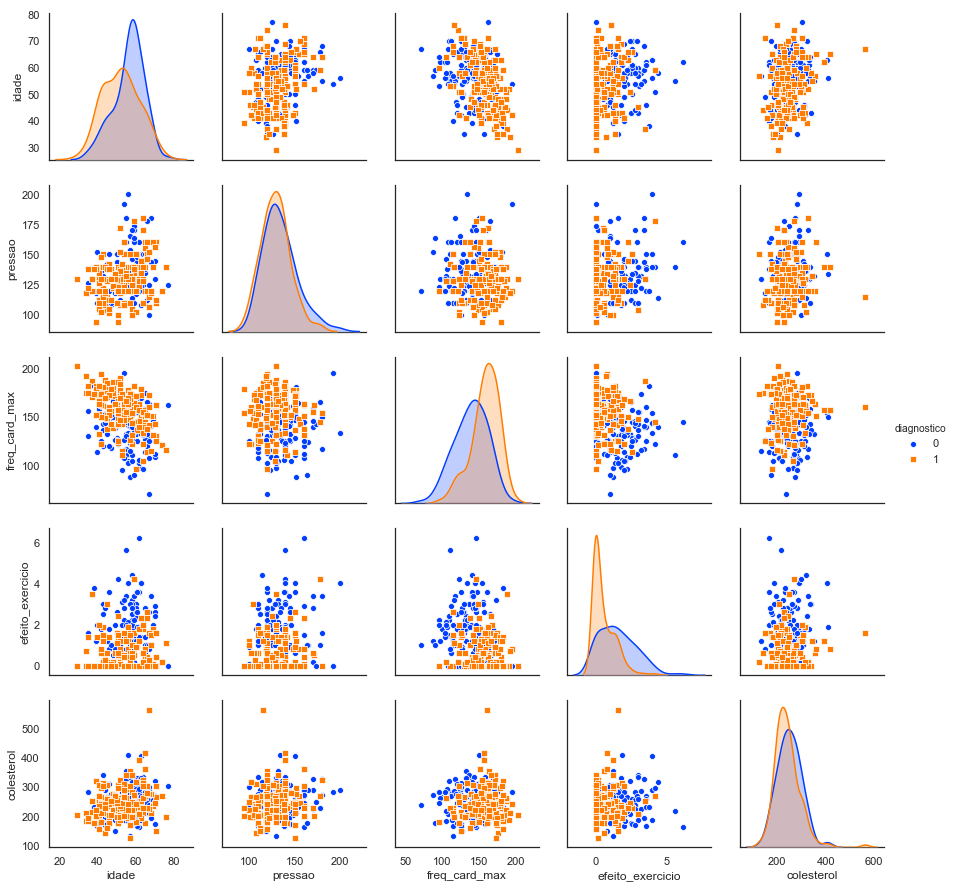

In [119]:
sns.pairplot(dados, hue = 'diagnostico', markers=["o", "s"], vars = [v for v in var_num], palette = sns.color_palette("bright", 10))

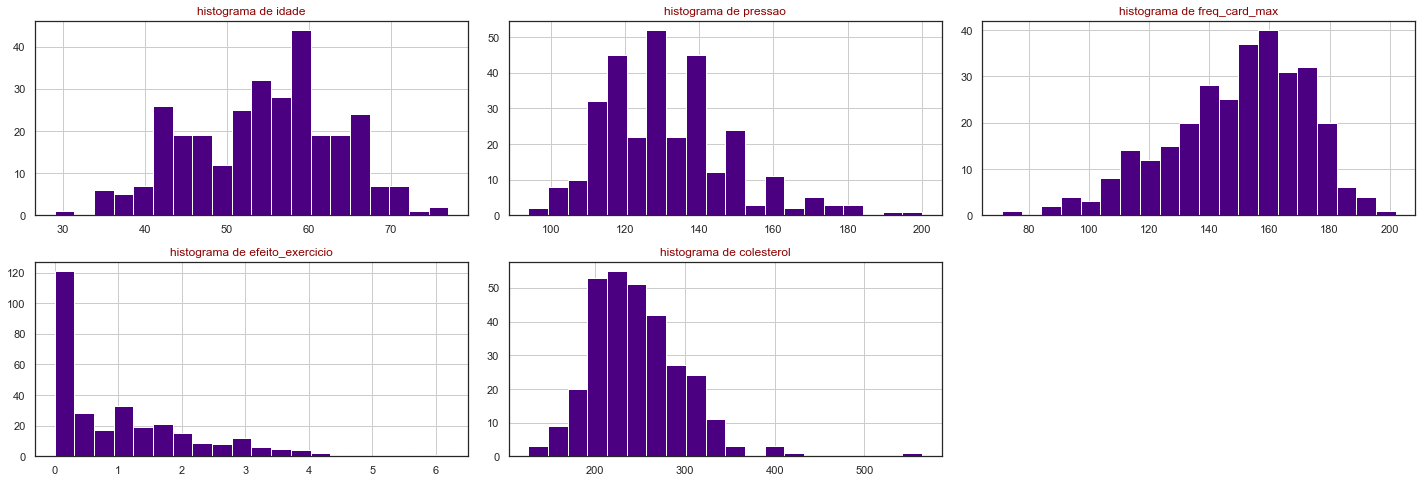

In [128]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,color='indigo')
        ax.set_title('histograma de '+feature,color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(dados[var_num],dados[var_num].columns,6,3)

## Variáveis qualitativas

In [139]:
import math
soma=0
for x in dados.lines:
    if math.isnan(x)==True:
        soma+=1


AttributeError: 'DataFrame' object has no attribute 'lines'

In [81]:
corrdados=dados[var_num].corr()

__________________
## Referências

https://www.paho.org/bra/index.php?option=com_content&view=article&id=5253:doencas-cardiovasculares&Itemid=1096